In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

page=requests.get('https://sotor.com/%D9%85%D9%82%D8%A7%D9%84_%D9%88%D8%B5%D9%81%D9%8A_%D8%B9%D9%86_%D8%A7%D9%84%D9%85%D8%B7%D8%B1')
soup = BeautifulSoup(page.content, 'html.parser')
artical =soup.find(id='mw-content-text')
par=artical.find('p').text
author='kadhum'
data_list=[]
data_list.append(par)
data={}
data[author]=data_list



page2=requests.get('https://mawdoo3.com/%D8%AA%D9%82%D8%B1%D9%8A%D8%B1_%D8%B9%D9%86_%D8%A7%D9%84%D9%85%D8%B7%D8%B1')
soup2 = BeautifulSoup(page2.content, 'html.parser')
artical2=soup2.find(id='mw-content-text')
par2=artical2.find('p').text
author2='ali'
data_list2=[]
data_list2.append(par2)
data2={}
data2[author2]=data_list2

data.update(data2)






In [4]:
print(data)

{'kadhum': ['عند كتابة مقال وصفي عن المطر فإنّه سيتم الحديث عن إحدى الظواهر الكونية التي لها رمزيّة خاصة بالنسبة للناس، فهطول المطر يعني بداية وصول الخير الذي تنتفع به الأرض والإنسان والحيوانات، فقد خلق الله تعالى الماء، وجعله سبب الحياة في هذه الأرض، وهناك العديد من المناطق حول العالم التي تعد الأمطار مصدر المياه الوحيد بالنسبة لها، وفي الفترات التي ينحبس فيها المطر عن تلك المناطق، تجف الأرض، وتذبل النباتات، وتشعر الحيوانات بالعطش الشديد، وهناك بعض المناطق الأخرى التي يكون هطول المطر فيها كثيفًا تبعًا للتضاريس الأرضية، وموقع هذه المناطق بالنسبة لخطوط الطول ودوائر العرض، حيث تُكسبها تلك المواقع خصوصية مطرية مختلفة.'], 'ali': ['المطر هو قطرات الماء التي تتساقط من السحاب على الأرض، والتي تبثّ الحياة في الكائنات على اختلافها، ويعتبر المطر شكلاً من أشكال الماء في الطبيعة، حيث يمثّل الحالة السائلة للماء، ويتكوّن من خلال تبخّر مياه المسطّحات المائيّة المختلفة بفعل أشعّة الشمس فيتحوّل الماء من الحالة السائلة إلى البخار أو الحالة الغازيّة، ثمّ يصعد لأعالي الجو، ويلامس الطبقات الباردة منه، مسبّ

In [5]:
pd.set_option('max_colwidth',150)
df=pd.DataFrame.from_dict(data).transpose()
df.columns=['novels']

df=df.sort_index()
# print(df.sort_index())

df

,novels
ali,المطر هو قطرات الماء التي تتساقط من السحاب على الأرض، والتي تبثّ الحياة في الكائنات على اختلافها، ويعتبر المطر شكلاً من أشكال الماء في الطبيعة، حي...
kadhum,عند كتابة مقال وصفي عن المطر فإنّه سيتم الحديث عن إحدى الظواهر الكونية التي لها رمزيّة خاصة بالنسبة للناس، فهطول المطر يعني بداية وصول الخير الذي ...


In [6]:
import re
import string

def clean_text(text):
    
        jumla=text
        noise = re.compile("""،| ّ    |  َ    |  ً    |  ُ    |  ٌ    |   ِ    |   ٍ    |  ْ    |   ـ """,re.VERBOSE)
        jumla = re.sub(noise, '', jumla)
        arabicword=re.sub("\[.*?\]", '' ,jumla)
        arabicword=re.sub('\w*\d\w*' ,'',jumla)
        # arabicword=re.findall('^[\u0621-\u064A\u0660-\u0669-a-z ]*',jumla)
        arabicword = re.sub('[%s]' % re.escape(string.punctuation), '', jumla)
        return arabicword
round1=lambda x:clean_text(x)
datacelan=pd.DataFrame(df.novels.apply(round1))
datacelan

,novels
ali,المطر هو قطرات الماء التي تتساقط من السحاب على الأرض والتي تبث الحياة في الكائنات على اختلافها ويعتبر المطر شكلا من أشكال الماء في الطبيعة حيث يمث...
kadhum,عند كتابة مقال وصفي عن المطر فإنه سيتم الحديث عن إحدى الظواهر الكونية التي لها رمزية خاصة بالنسبة للناس فهطول المطر يعني بداية وصول الخير الذي تنت...


In [7]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)
datacelan=pd.DataFrame(df.novels.apply(round1))
datacelan

,novels
ali,المطر هو قطرات الماء التي تتساقط من السحاب على الأرض والتي تبث الحياة في الكائنات على اختلافها ويعتبر المطر شكلا من أشكال الماء في الطبيعة حيث يمث...
kadhum,عند كتابة مقال وصفي عن المطر فإنه سيتم الحديث عن إحدى الظواهر الكونية التي لها رمزية خاصة بالنسبة للناس فهطول المطر يعني بداية وصول الخير الذي تنت...


In [8]:
arabic_stop_words=["من","إلى"]
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=arabic_stop_words)
data_cv = cv.fit_transform(datacelan.novels)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = datacelan.index
data_dtm.head(50)

,أخيرا,أساسيات,أشعة,أشكال,أما,أهمية,أو,إحدى,إشارة,إنسان,...,ويتكون,ويعتبر,ويقول,ويلامس,يصعد,يضمن,يعني,يكون,يمثل,ينحبس
ali,1,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,0,0,1,0
kadhum,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1


In [13]:
filped_data=data_dtm.T

filped_data.mean

<bound method DataFrame.mean of          ali  kadhum
أخيرا      1       0
أساسيات    1       0
أشعة       1       0
أشكال      1       0
أما        1       0
...      ...     ...
يضمن       1       0
يعني       0       1
يكون       0       1
يمثل       1       0
ينحبس      0       1

[182 rows x 2 columns]>

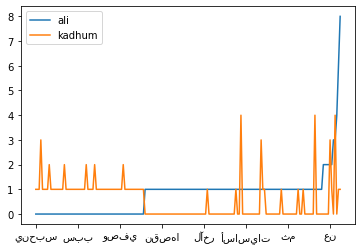

In [17]:
filped_data.plot()

In [15]:
filped_data.sort_values(by=['ali'], inplace=True)

In [16]:
filped_data

,ali,kadhum
ينحبس,0,1
بعض,0,1
بداية,0,1
بالنسبة,0,3
بالعطش,0,1
...,...,...
الحالة,3,0
المطر,3,4
على,4,0
الماء,6,1
